In [12]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


df = pd.read_csv("df.csv")

# 종속 변수(y)와 독립 변수(X) 분리
X = df.drop(['image_file','score'], axis=1)
y = df['score']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MinMaxScaler를 사용하여 특성 정규화
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 훈련
rf_regressor.fit(X_train, y_train)

# 테스트 세트에 대한 예측
predictions = rf_regressor.predict(X_test)

# 평균 제곱 오차(Mean Squared Error)로 평가
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.015395845106241313


In [18]:
result_df = pd.DataFrame({'Image_File': X_test.index, 'Prediction': predictions})
result_df

,Image_File,Prediction
0,1357,0.809252
1,2080,0.757971
2,2718,0.618816
3,812,0.722885
4,4886,0.659291
...,...,...
1262,1512,0.784236
1263,57,0.846647
1264,6091,0.557133
1265,3403,0.719589


In [23]:
# 예측 결과와 이미지 파일 이름을 담을 새로운 데이터프레임 생성
result_df = pd.DataFrame({'Image_File': X_test.index, 'Prediction': predictions, 'True':y_test})

# 이미지 파일 이름 가져오기
result_df['Image_File'] = result_df['Image_File'].apply(lambda idx: df.loc[idx, 'image_file'])
result_df

,Image_File,Prediction,True
1357,val2017/000000084031.jpg,0.809252,0.833830
2080,val2017/000000002685.jpg,0.757971,0.798287
2718,val2017/000000500478.jpg,0.618816,0.764805
812,val2017/000000477288.jpg,0.722885,0.862804
4886,val2017/000000382125.jpg,0.659291,0.624039
...,...,...,...
1512,val2017/000000492282.jpg,0.784236,0.826635
57,val2017/000000001000.jpg,0.846647,0.923627
6091,val2017/000000311002.jpg,0.557133,0.391270
3403,val2017/000000153529.jpg,0.719589,0.728226


In [41]:
result_df = result_df.sort_values(by="Prediction", ignore_index=True)
result_df

,Image_File,Prediction,True
0,val2017/000000261097.jpg,0.443119,0.318116
1,val2017/000000302536.jpg,0.473942,0.388944
2,val2017/000000224337.jpg,0.480215,0.431109
3,val2017/000000226662.jpg,0.481409,0.486862
4,val2017/000000226154.jpg,0.495707,0.716281
...,...,...,...
1262,val2017/000000568981.jpg,0.859444,0.826530
1263,val2017/000000514797.jpg,0.860600,0.638478
1264,val2017/000000006954.jpg,0.861259,0.771370
1265,val2017/000000358195.jpg,0.861821,0.925247


<Axes: >

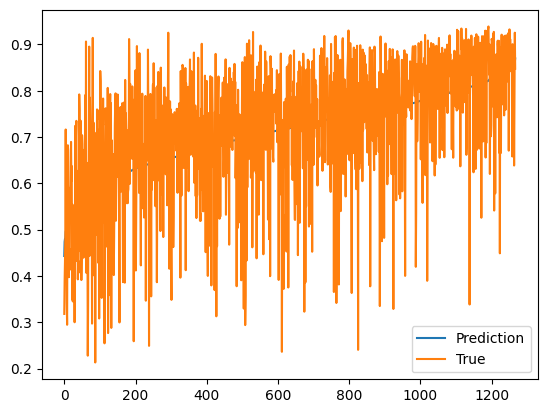

In [42]:
import matplotlib.pyplot as plt

result_df[['Prediction', 'True']].plot()

<Axes: >

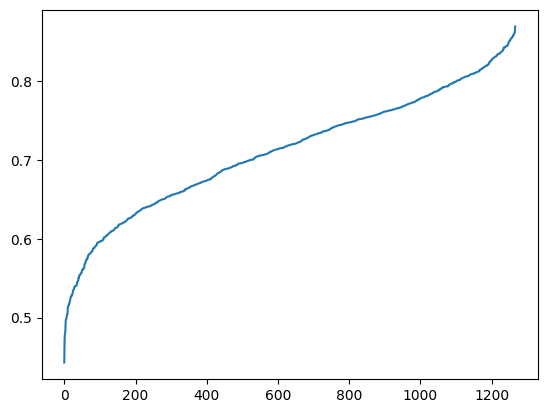

In [43]:
result_df['Prediction'].plot()

<Axes: >

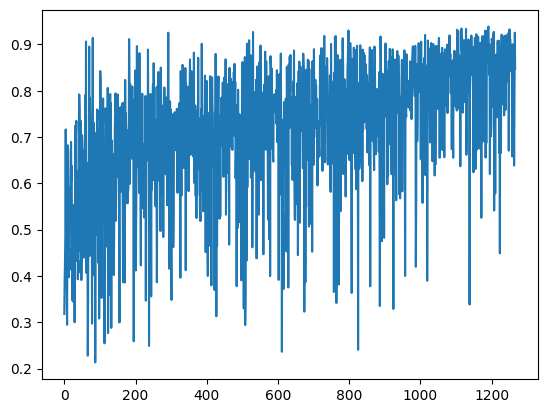

In [44]:
result_df[ 'True'].plot()

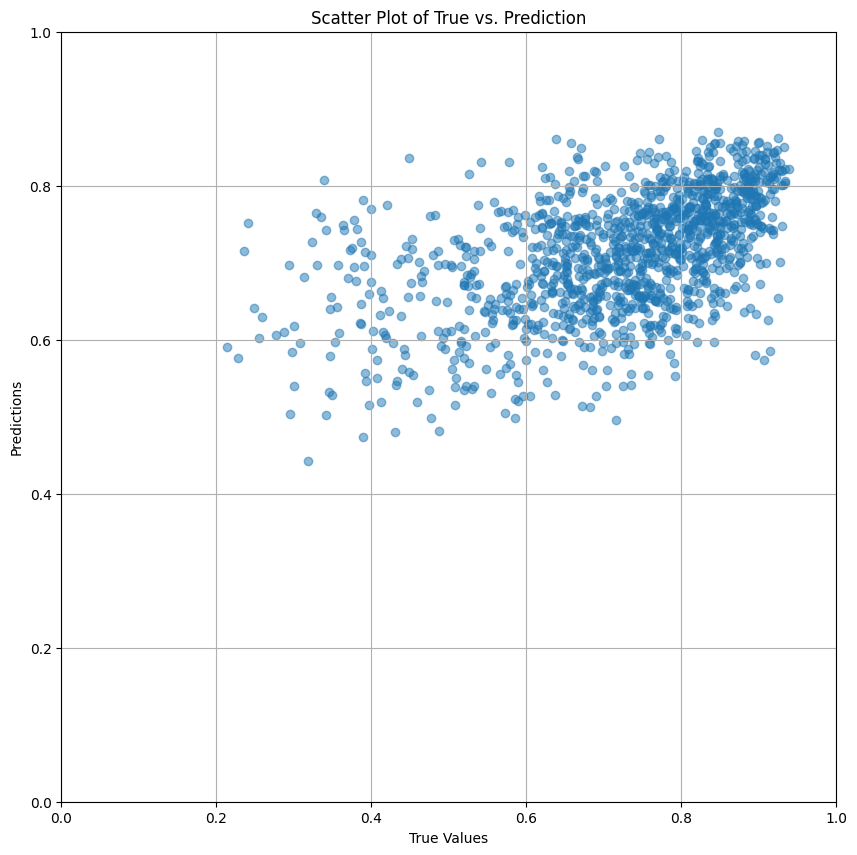

In [49]:
import matplotlib.pyplot as plt

# 예측값과 실제값의 산점도 그리기
plt.figure(figsize=(10, 10))
plt.scatter(result_df['True'], result_df['Prediction'], alpha=0.5)
plt.title('Scatter Plot of True vs. Prediction')
plt.xlabel('True Values')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

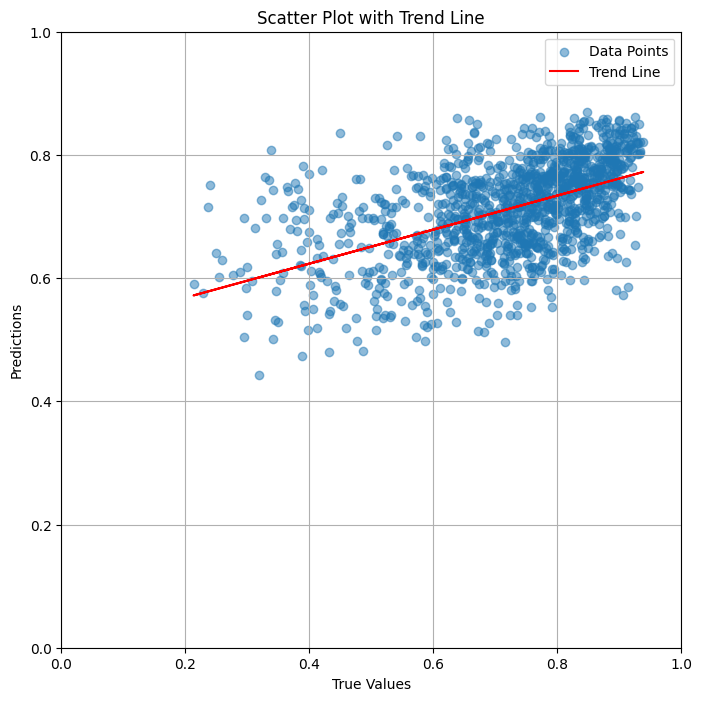

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# 예측값과 실제값의 산점도 그리기
plt.figure(figsize=(8,8))
plt.scatter(result_df['True'], result_df['Prediction'], alpha=0.5, label='Data Points')

# 최소 제곱 회귀선 구하기
slope, intercept, r_value, p_value, std_err = linregress(result_df['True'], result_df['Prediction'])
line = slope * result_df['True'] + intercept

# 산점도와 추세선 그리기
plt.plot(result_df['True'], line, color='red', label='Trend Line')
plt.title('Scatter Plot with Trend Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()

In [67]:
result_df

,Image_File,Prediction,True
0,val2017/000000261097.jpg,0.443119,0.318116
1,val2017/000000302536.jpg,0.473942,0.388944
2,val2017/000000224337.jpg,0.480215,0.431109
3,val2017/000000226662.jpg,0.481409,0.486862
4,val2017/000000226154.jpg,0.495707,0.716281
...,...,...,...
1262,val2017/000000568981.jpg,0.859444,0.826530
1263,val2017/000000514797.jpg,0.860600,0.638478
1264,val2017/000000006954.jpg,0.861259,0.771370
1265,val2017/000000358195.jpg,0.861821,0.925247


(0.0, 25000.0)

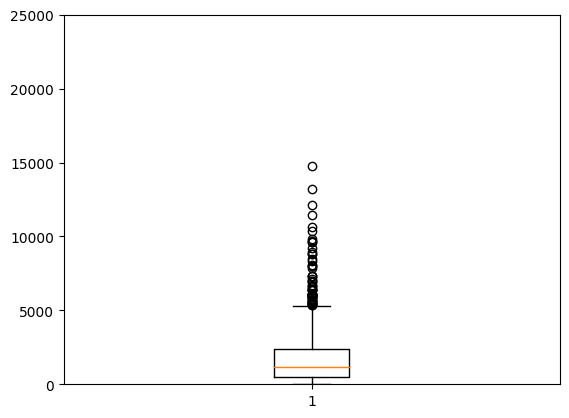

In [156]:
plt.boxplot(df[df['image_file'].isin(list(result_df.head(200)['Image_File']))]['laplacian'])
plt.ylim(0, 25000)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc8dcaaca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc8dcba220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc8dcaaa00>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc8dcba760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc8dcbaa00>],
 'means': []}

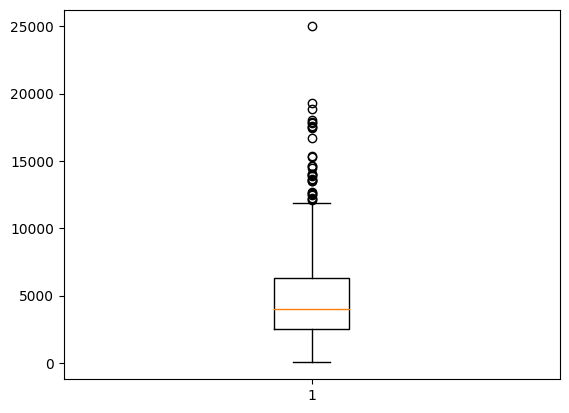

In [155]:
plt.boxplot(df[df['image_file'].isin(list(result_df.tail(200)['Image_File']))]['laplacian'])

<Axes: >

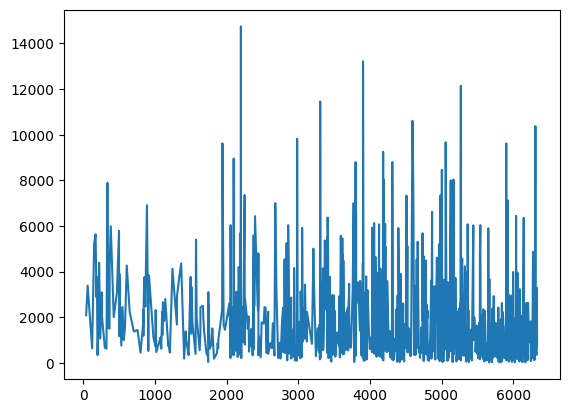

In [152]:
# low_score_image
df[df['image_file'].isin(list(result_df.head(200)['Image_File']))]['laplacian'].plot()

<Axes: >

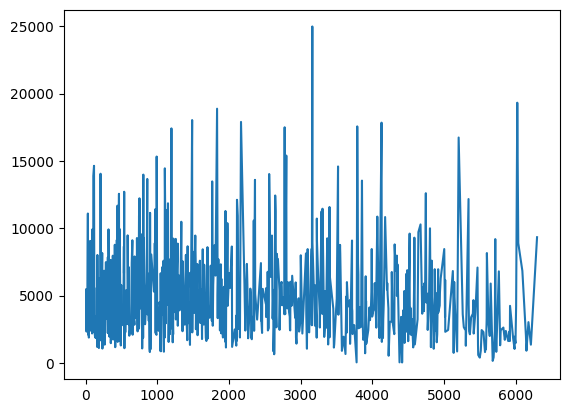

In [153]:
# high_score
df[df['image_file'].isin(list(result_df.tail(200)['Image_File']))]['laplacian'].plot()

In [119]:
low_score_image = result_df.head(20)
low_score_image

,Image_File,Prediction,True
0,val2017/000000261097.jpg,0.443119,0.318116
1,val2017/000000302536.jpg,0.473942,0.388944
2,val2017/000000224337.jpg,0.480215,0.431109
3,val2017/000000226662.jpg,0.481409,0.486862
4,val2017/000000226154.jpg,0.495707,0.716281
5,val2017/000000044877.jpg,0.498294,0.477426
6,val2017/000000331280.jpg,0.498726,0.586041
7,val2017/000000571598.jpg,0.501965,0.342143
8,val2017/000000203389.jpg,0.503901,0.294690
9,val2017/000000461751.jpg,0.504517,0.572045


In [ ]:
low score image 의 경우 바운딩박스가 엄청 많음

In [117]:
df[df['image_file']=='val2017/000000108253.jpg']

,image_file,score,width,height,bbox_size,entropy,laplacian,brightness,B_sd,red,...,Variance,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2
5891,val2017/000000108253.jpg,0.458938,159.89,285.64,45670.9796,6.247152,610.725185,36.961845,54.715868,58.881673,...,2970.128646,0.347092,73.481295,11674.021618,7.199663,10.011258,0.000509,3.613688,-0.395108,0.996236


In [86]:
df.loc[6252]

image_file             val2017/000000261097.jpg
score                                  0.318116
width                                     55.02
height                                    51.68
bbox_size                             2843.4336
entropy                                5.720555
laplacian                            163.328268
brightness                            32.154724
B_sd                                  41.197775
red                                   36.117291
blue                                  30.839929
green                                  30.37148
color_var                           1829.176287
contrast                                 0.9875
img_size                                 166500
edge_intensity                         9.454545
saturation                           128.172193
sift                                          1
c_moment_x                                   19
c_moment_y                                   16
bbox_prop                              0

In [90]:
df[df['image_file']=='val2017/000000235836.jpg']

,image_file,score,width,height,bbox_size,entropy,laplacian,brightness,B_sd,red,...,Variance,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2
1073,val2017/000000235836.jpg,0.847537,155.88,325.52,50742.0576,7.833908,7134.375108,117.167782,66.719315,130.683553,...,4452.065132,0.111359,234.159876,16638.195522,8.76429,13.932019,0.000106,5.793894,-0.221378,0.984039


In [91]:
df.loc[1073]

image_file             val2017/000000235836.jpg
score                                  0.847537
width                                    155.88
height                                   325.52
bbox_size                            50742.0576
entropy                                7.833908
laplacian                           7134.375108
brightness                           117.167782
B_sd                                  66.719315
red                                  130.683553
blue                                  88.281112
green                                115.882442
color_var                           4815.079295
contrast                                    1.0
img_size                                 273280
edge_intensity                        68.782928
saturation                           107.164387
sift                                        368
c_moment_x                                   68
c_moment_y                                  165
bbox_prop                              0

In [89]:
high_score_image = result_df.tail()
high_score_image

,Image_File,Prediction,True
1262,val2017/000000568981.jpg,0.859444,0.826530
1263,val2017/000000514797.jpg,0.860600,0.638478
1264,val2017/000000006954.jpg,0.861259,0.771370
1265,val2017/000000358195.jpg,0.861821,0.925247
1266,val2017/000000235836.jpg,0.869564,0.847537


In [76]:
low_score_images_df = df[df['image_file'].isin(low_score_image)]
low_score_images_df

,image_file,score,width,height,bbox_size,entropy,laplacian,brightness,B_sd,red,...,Variance,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2
169,val2017/000000261097.jpg,0.908766,68.42,234.89,16071.1738,7.707587,5632.484540,114.985231,68.727992,118.288399,...,4749.020024,0.124617,229.769135,17758.757122,8.658091,13.058328,0.000136,5.545191,-0.306725,0.995467
2101,val2017/000000302536.jpg,0.797244,191.29,338.76,64801.4004,7.225939,664.789012,79.155535,45.524901,83.815282,...,2077.214728,0.314551,158.273235,8138.834158,8.202913,11.580335,0.000469,3.795877,-0.397259,0.998260
2395,val2017/000000261097.jpg,0.782902,35.81,54.08,1936.6048,7.177503,6429.404749,69.077778,58.256119,69.676190,...,3403.655214,0.115744,138.865931,12058.952763,8.001421,11.030027,0.000116,5.753313,-0.465689,0.999380
2667,val2017/000000224337.jpg,0.767897,365.45,425.08,155345.4860,7.169568,1399.375193,115.896013,46.219886,137.365383,...,2131.799901,0.136438,231.770854,8298.048268,8.124660,12.591267,0.000171,4.789009,-0.243195,0.984315
3607,val2017/000000226154.jpg,0.716281,63.03,54.61,3442.0683,5.024753,439.609004,46.585538,10.942122,44.232804,...,116.701020,0.296460,93.103011,381.812724,5.890432,8.955983,0.000683,3.656858,-0.214199,0.937375
5519,val2017/000000224337.jpg,0.542796,50.65,119.02,6028.3630,6.835039,248.742542,55.969916,30.478651,64.737983,...,914.326071,0.207190,110.860352,3616.287570,7.787066,11.091955,0.000497,3.763773,-0.374154,0.996883
5646,val2017/000000224337.jpg,0.516709,199.06,211.87,42174.8422,4.425014,368.339844,25.271333,44.239809,26.550692,...,1950.441806,0.613553,50.290532,7727.337876,5.000282,6.715354,0.001371,2.816596,-0.479061,0.992592
5797,val2017/000000226662.jpg,0.486862,51.55,197.50,10181.1250,5.887363,46.340246,30.268140,32.936393,30.268140,...,1065.251220,0.389742,59.820776,4221.727385,6.812641,9.293893,0.000918,3.317684,-0.415061,0.995468
5973,val2017/000000224337.jpg,0.431109,84.34,144.04,12148.3336,5.903501,384.155218,32.263393,34.450616,28.769676,...,1160.989553,0.425839,63.917832,4569.287821,6.697196,9.110923,0.000658,3.384736,-0.452788,0.997516
6079,val2017/000000226662.jpg,0.395035,78.84,203.56,16048.6704,6.591112,139.649479,44.703234,41.074836,44.703234,...,1686.743058,0.322142,89.672440,6672.159134,7.555094,10.491789,0.000491,3.736913,-0.407414,0.997452


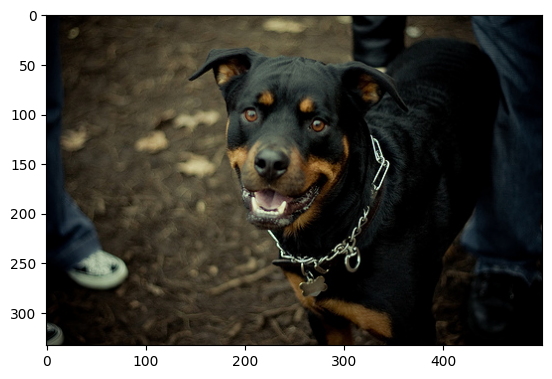

In [121]:
#low score
import cv2
img = cv2.imread('val2017/000000253386.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

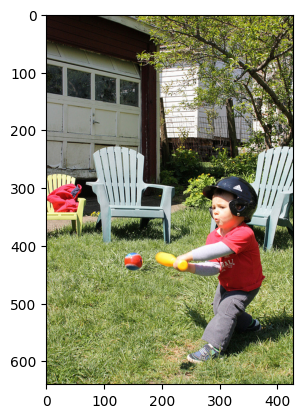

In [98]:
#high score
img = cv2.imread('val2017/000000235836.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)